In [8]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
import imblearn 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set(rc={'figure.figsize':(15,8)})

In [25]:
df = pd.read_csv('.\heart_2020_cleaned.csv')

# Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
print(df['HeartDisease'].value_counts())

No     307726
Yes     12069
Name: Stroke, dtype: int64


In [6]:
for col in df:
    print(f'{col}: {df[col].unique()}')

HeartDisease: ['No' 'Yes']
BMI: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
PhysicalHealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime: [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma: ['Yes' 'No']
KidneyDisease: 

In [19]:
fig = make_subplots(
    rows=3, cols=4, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"}],
       [{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"}],
       [{"type": "domain"}, {"type": "domain"},{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=3)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=4)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=3)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=2, col=4)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=3)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=3, col=4)




fig.update_layout(height=1500, font=dict(size=15), showlegend=False)

fig.show()

# Null values

In [197]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Duplicates

In [198]:
print(df.duplicated().sum())
print(df.drop_duplicates())

# Binning

In [21]:
def hist_plots(df):
    plt.figure(figsize=(10,4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()


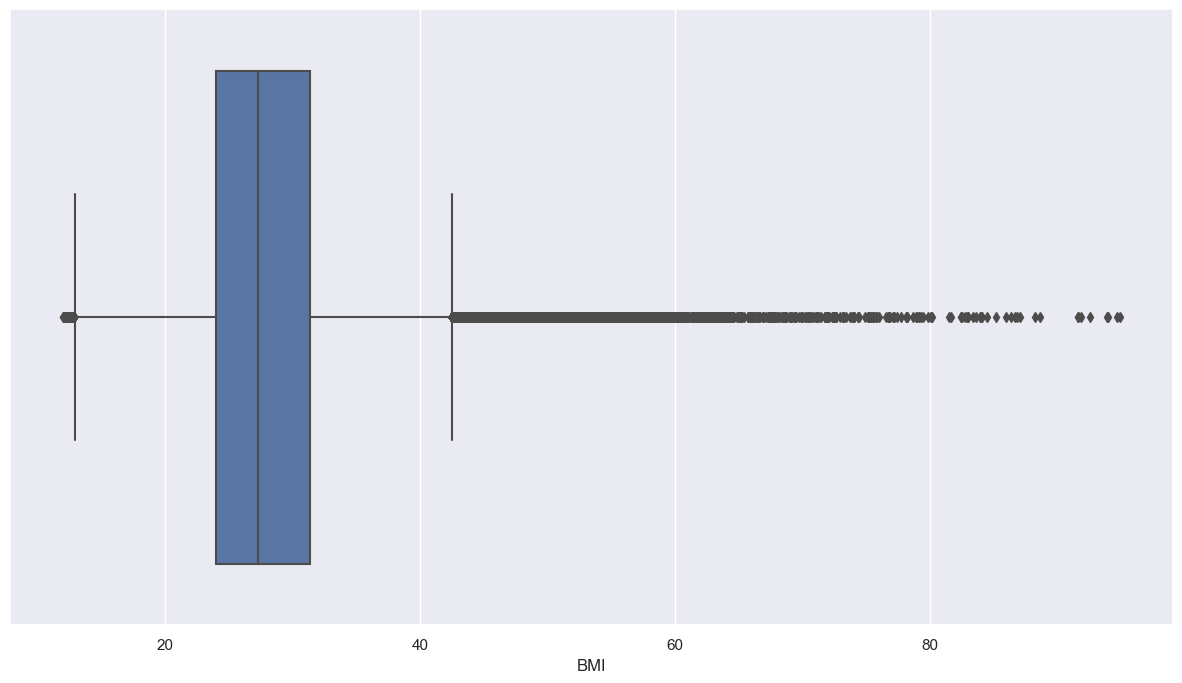

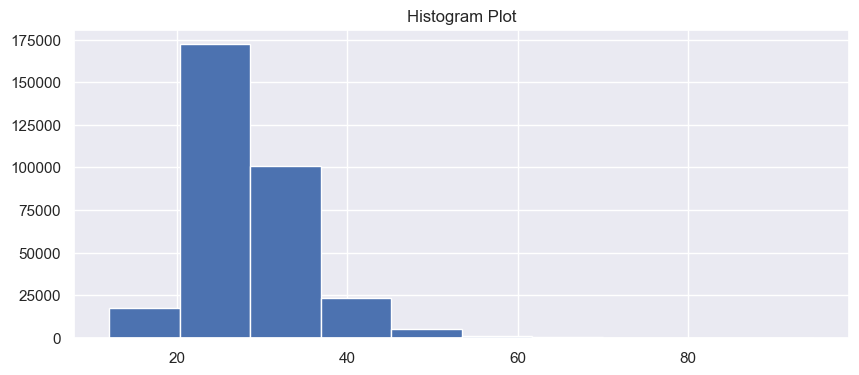

Valor minimo 12.02
Valor máximo 94.85


In [23]:
sns.boxplot(x=df['BMI'])
hist_plots(df['BMI'])

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

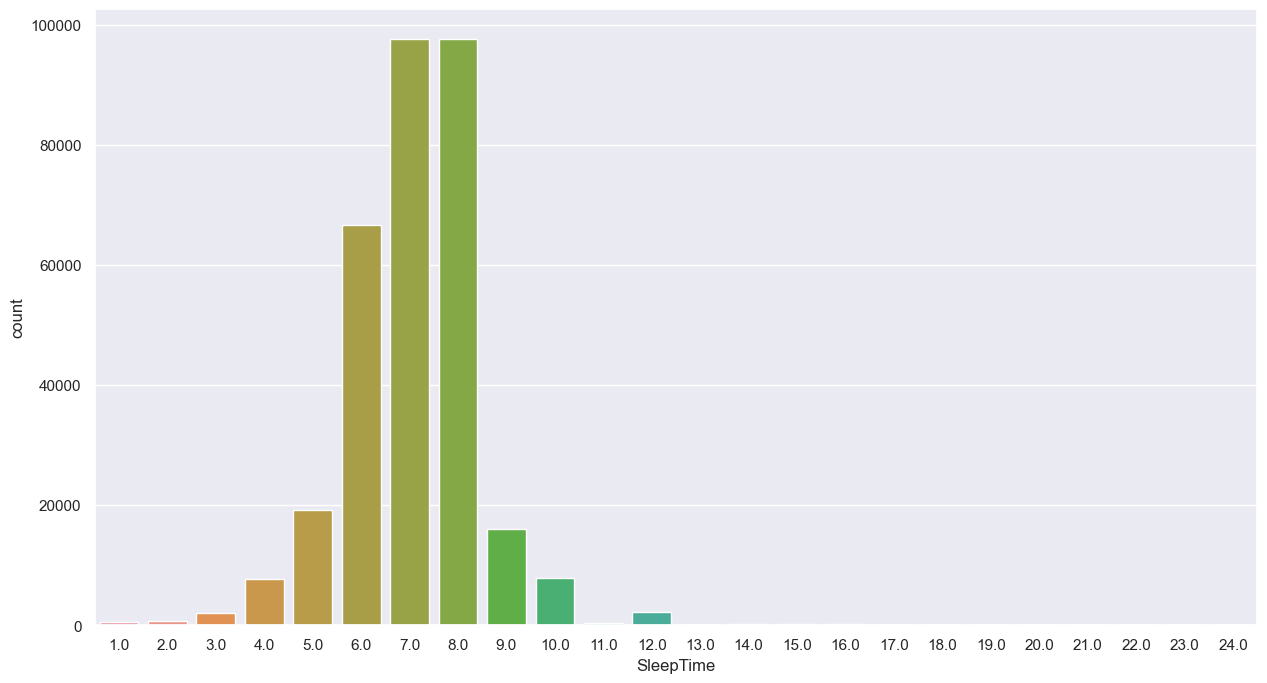

In [201]:
sns.countplot(x=df['SleepTime'])

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

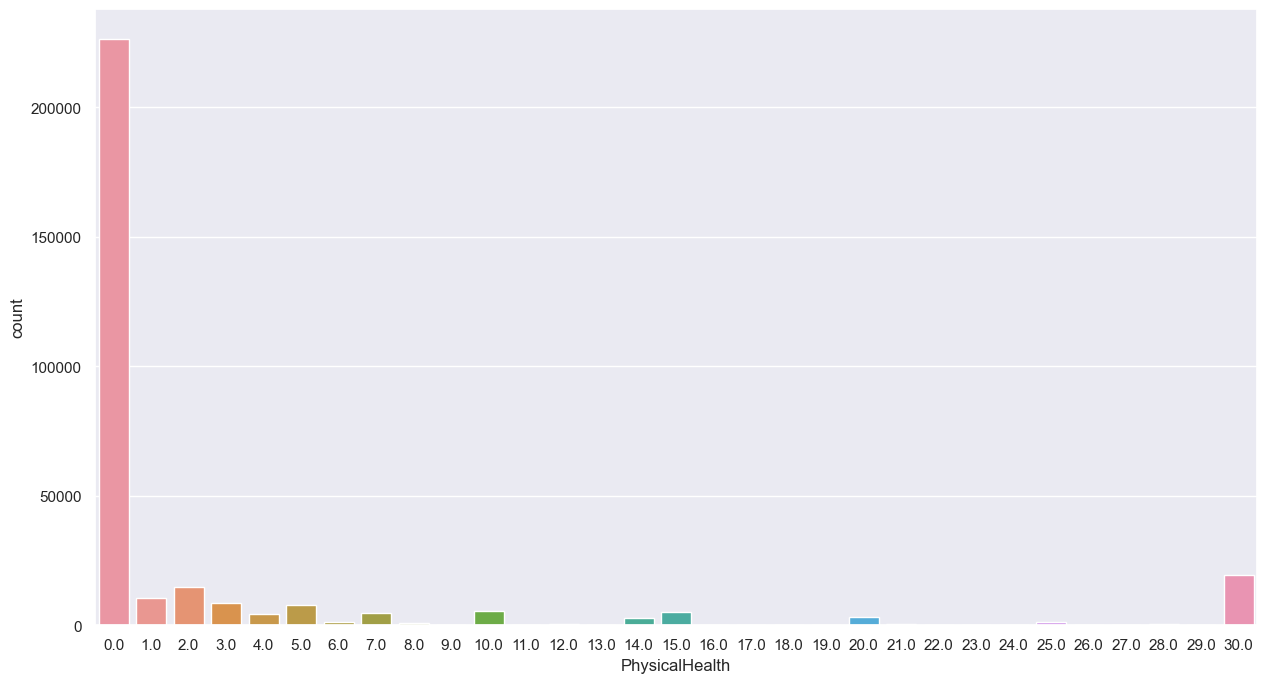

In [202]:
sns.countplot(x=df['PhysicalHealth'])

<AxesSubplot:xlabel='MentalHealth', ylabel='count'>

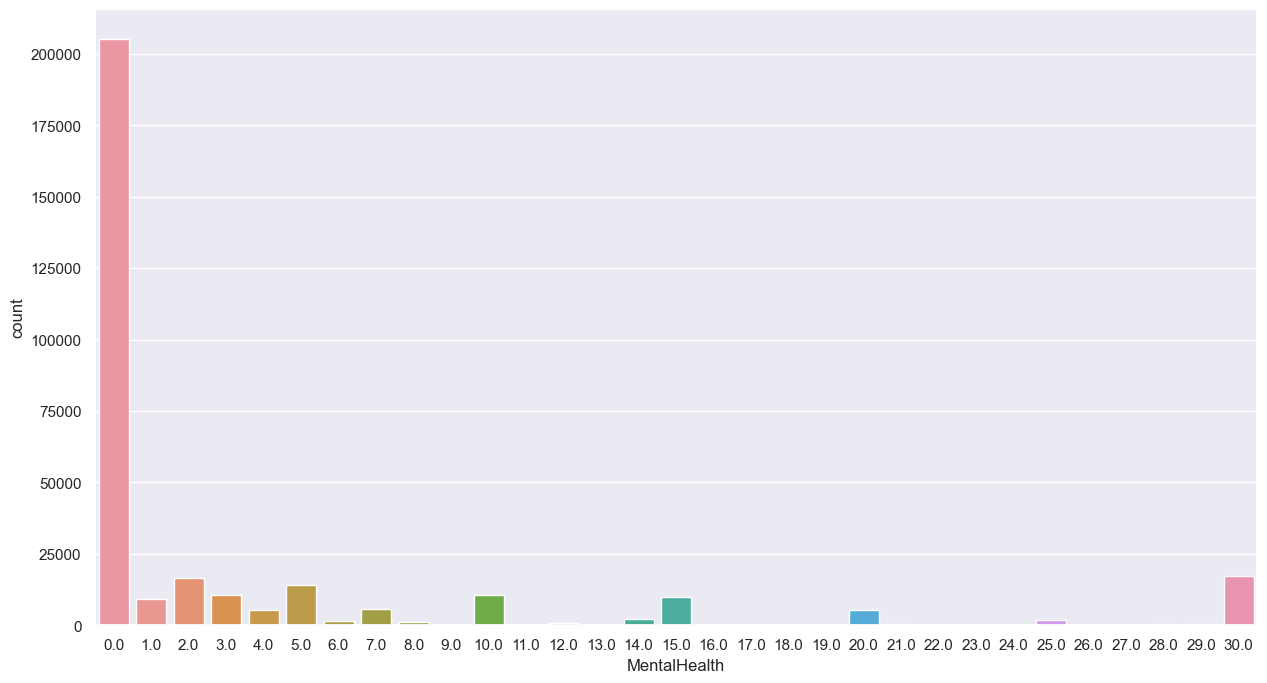

In [203]:
sns.countplot(x=df['MentalHealth'])

Binning do BMI: 

(0,18.5] = Underweight

(18.5,24.9] = Normal

(24.9,29.9] = Overweight

(29.9,34.9) = Obese

(34.9,100) = Extremely Obese

In [204]:
df['BMI']=pd.cut(x=df['BMI'],bins=[0,18.5,24.9,29.9,34.9,100],labels=['0','1','2','3','4'])

replace_map = {'BMI':{'0':0, '1':1,'2':2,'3':3,'4':4}}
df.replace(replace_map,inplace=True)

<AxesSubplot:xlabel='BMI'>

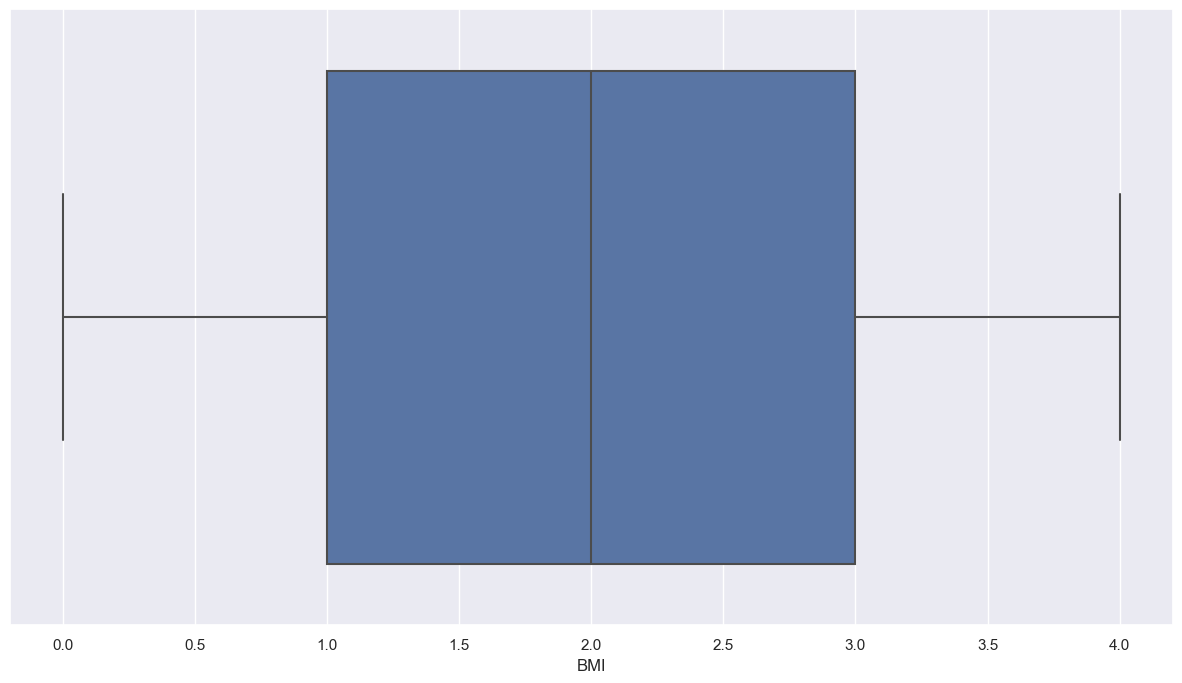

In [205]:
sns.boxplot(x=df['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='count'>

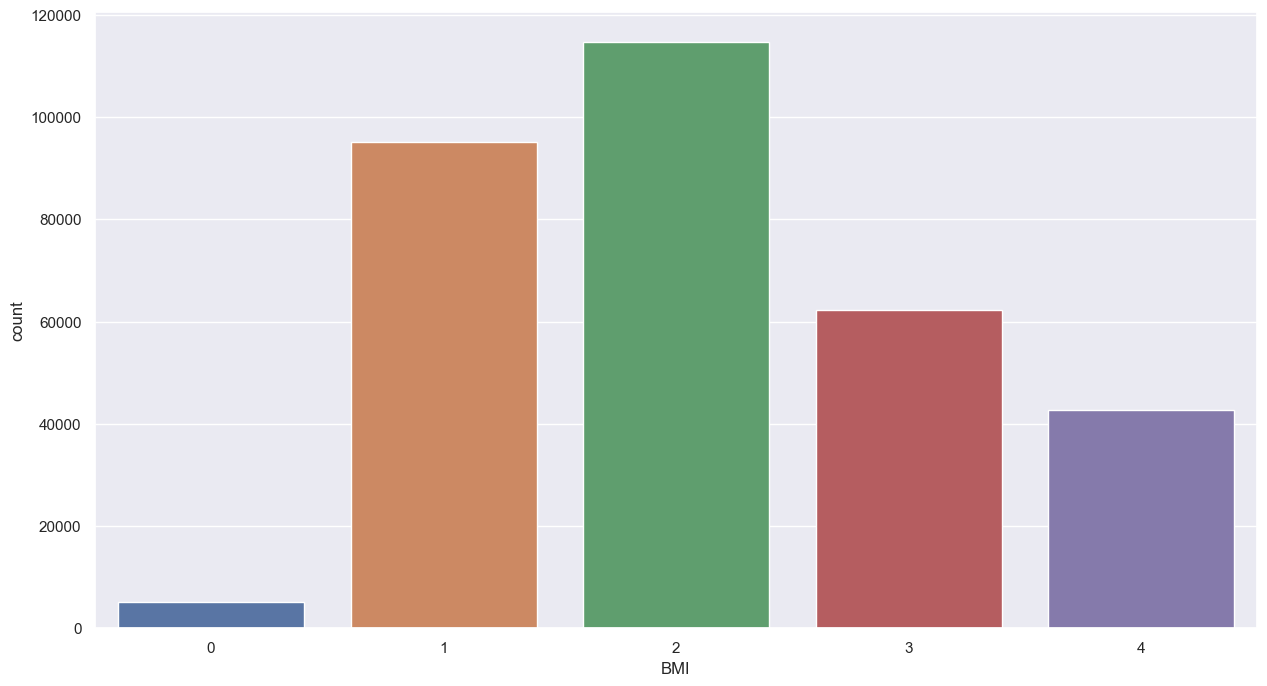

In [206]:
sns.countplot(x=df['BMI'])

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

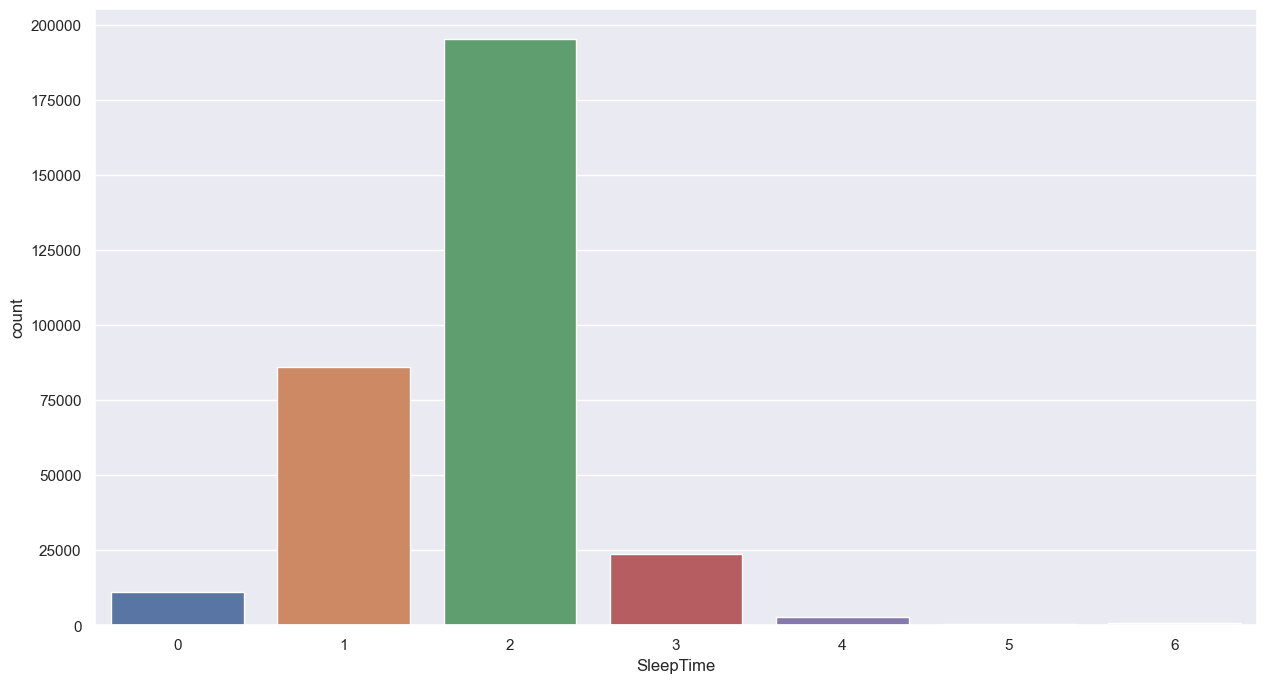

In [207]:
df['SleepTime']=pd.cut(x=df['SleepTime'],bins=[-1,4,6,8,10,12,14,24],labels=[0,1,2,3,4,5,6])
sns.countplot(x=df['SleepTime'])

<AxesSubplot:xlabel='PhysicalHealth', ylabel='count'>

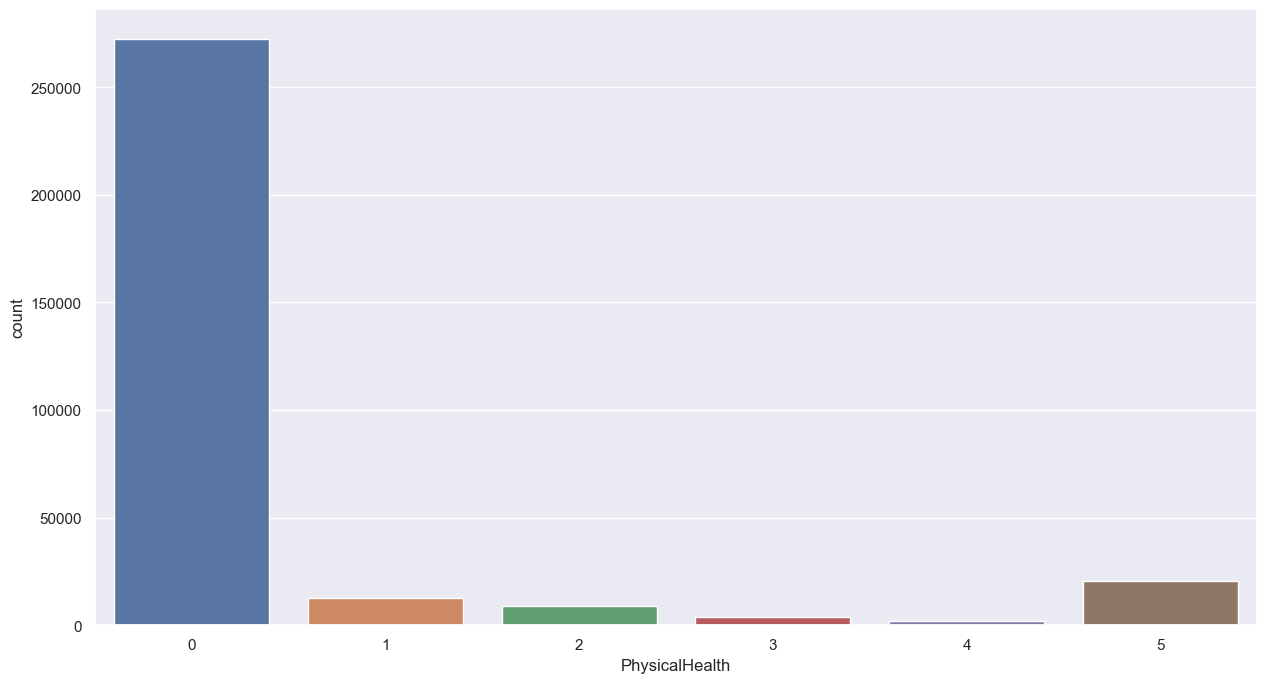

In [208]:
df['PhysicalHealth']=pd.cut(x=df['PhysicalHealth'],bins=[-1,5,10,15,20,25,35],labels=[0,1,2,3,4,5])
sns.countplot(x=df['PhysicalHealth'])

<AxesSubplot:xlabel='MentalHealth', ylabel='count'>

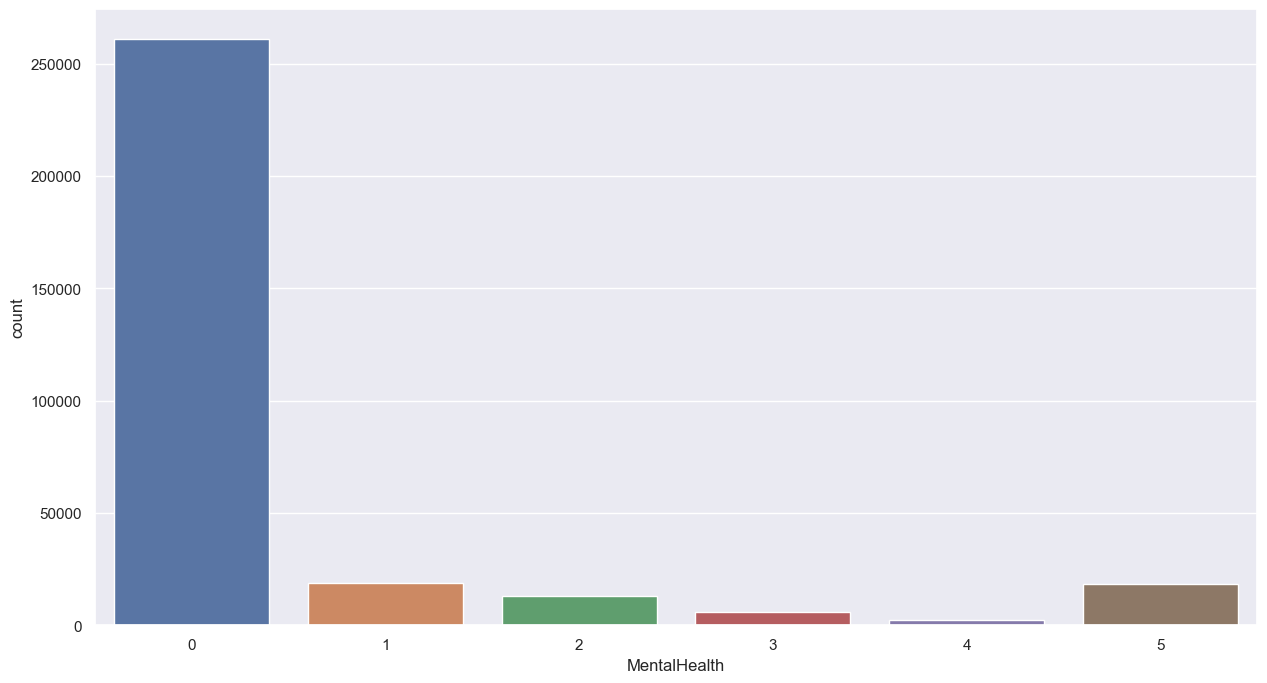

In [209]:
df['MentalHealth']=pd.cut(x=df['MentalHealth'],bins=[-1,5,10,15,20,25,35],labels=[0,1,2,3,4,5])
sns.countplot(x=df['MentalHealth'])